<a href="https://colab.research.google.com/github/jubayerij001-a11y/My-Project/blob/main/Project%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA


In [7]:
df = pd.read_csv('/content/spotify dataset.csv')
df.head()


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [8]:
df.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [11]:
features = df.select_dtypes(include=[np.number])

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)


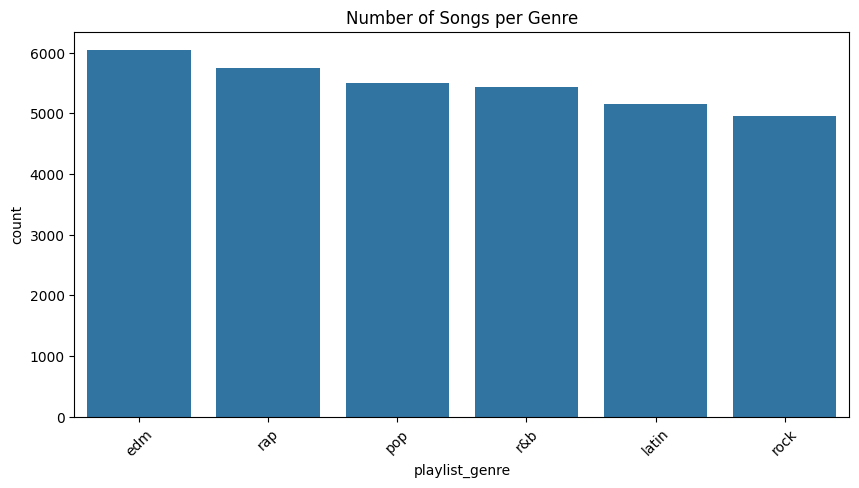

In [13]:
# Distribution of songs by genre
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='playlist_genre', order=df['playlist_genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Songs per Genre')
plt.show()

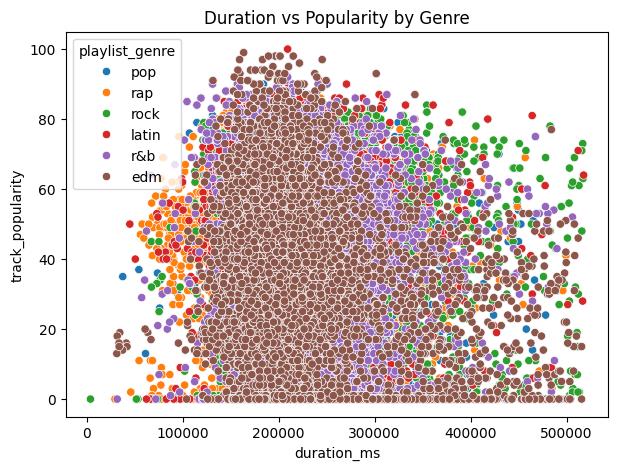

In [14]:
# Duration vs Popularity
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='duration_ms', y='track_popularity', hue='playlist_genre')
plt.title('Duration vs Popularity by Genre')
plt.show()

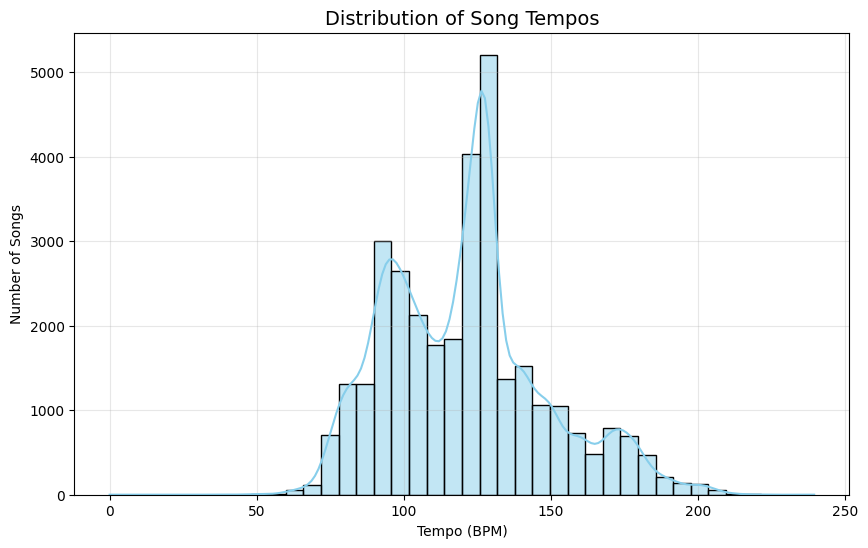

In [15]:
# Histogram of tempo
plt.figure(figsize=(10,6))
sns.histplot(df['tempo'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Song Tempos', fontsize=14)
plt.xlabel('Tempo (BPM)')
plt.ylabel('Number of Songs')
plt.grid(alpha=0.3)
plt.show()


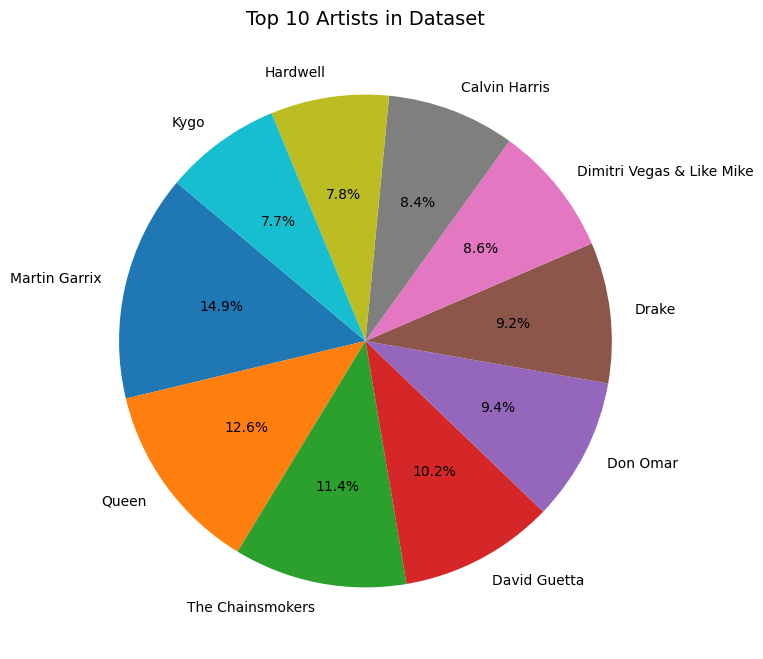

In [16]:
# Pie chart of top 10 artists
top_artists = df['track_artist'].value_counts().head(10)

plt.figure(figsize=(8,8))
plt.pie(top_artists.values, labels=top_artists.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Artists in Dataset', fontsize=14)
plt.show()


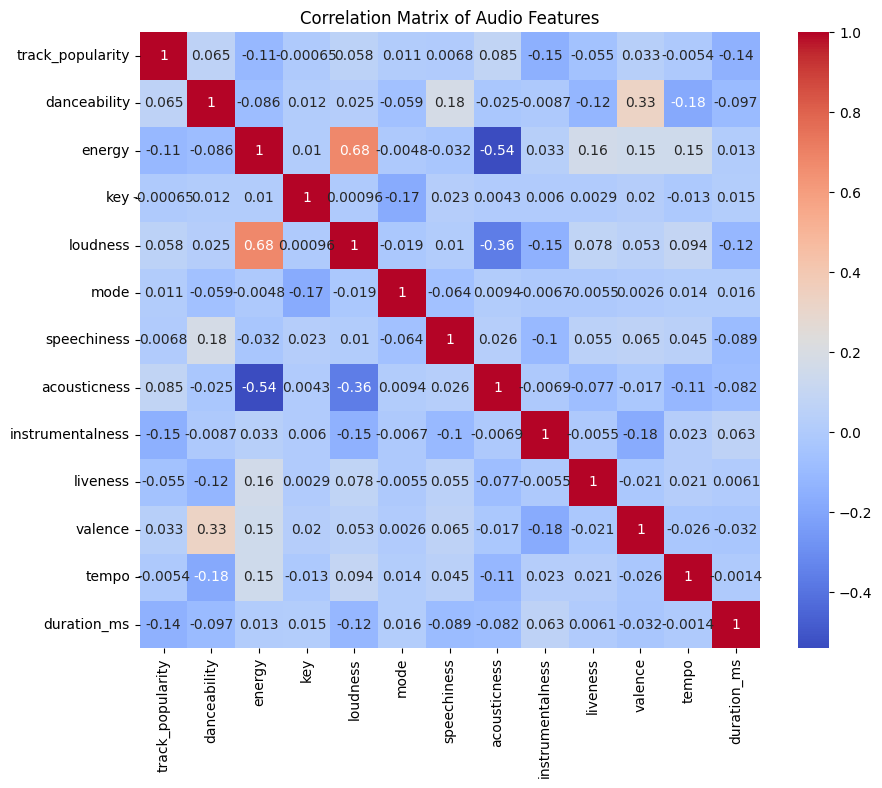

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(features.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Matrix of Audio Features")
plt.show()


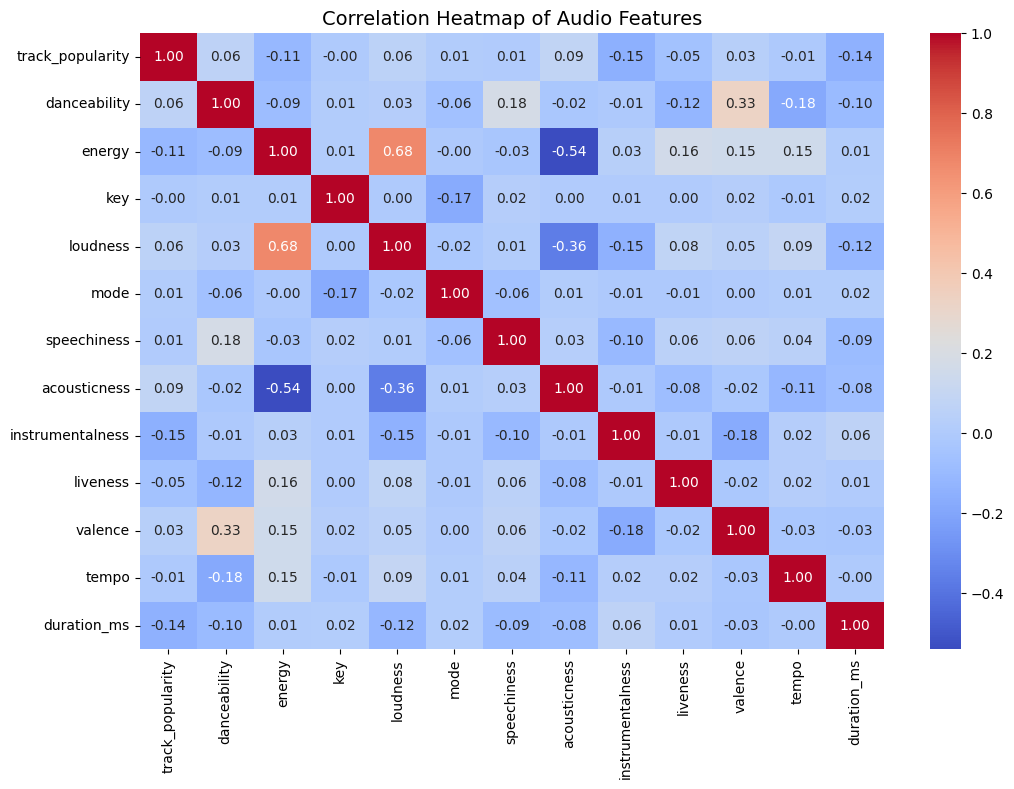

In [18]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Audio Features', fontsize=14)
plt.show()

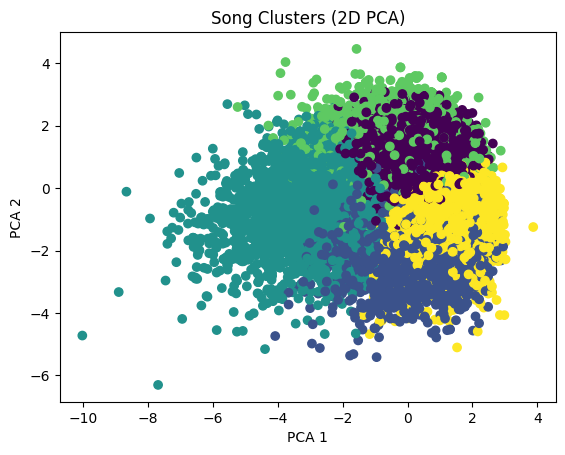

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)
df['Cluster'] = kmeans.labels_

# Visualize clusters
pca = PCA(2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:,0], pca_data[:,1], c=df['Cluster'])
plt.title('Song Clusters (2D PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


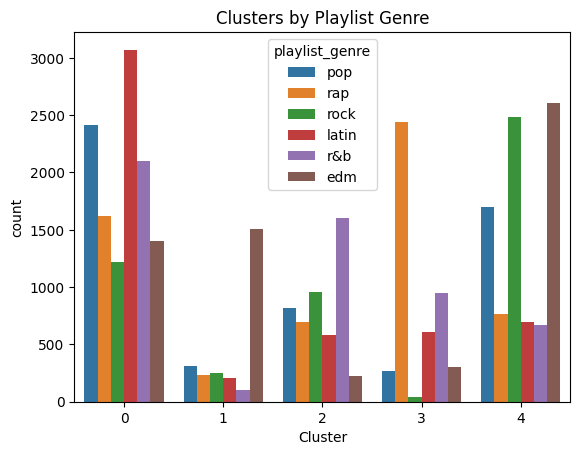

In [20]:
sns.countplot(x='Cluster', hue='playlist_genre', data=df)
plt.title("Clusters by Playlist Genre")
plt.show()


In [21]:
cos_sim = cosine_similarity(scaled_data)

def recommend(song_index, n=5):
    scores = list(enumerate(cos_sim[song_index]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    top_songs = [i[0] for i in sorted_scores[1:n+1]]
    return df.iloc[top_songs][['track_artist', 'track_popularity', 'playlist_genre']]

In [22]:
song_index = 10  # pick a song
recommend(song_index)
print("Number of clusters formed:", df['Cluster'].nunique())
print("\nSample Recommendations:")
print(recommend(10))


Number of clusters formed: 5

Sample Recommendations:
        track_artist  track_popularity playlist_genre
248     Zara Larsson                65            pop
10880       Ecologyk                42            rap
17697        Badshah                71          latin
14583         NIHILS                51           rock
17887  Chino & Nacho                66          latin
